# Nripesh Kumar


### GRIP Task 3: To explore Unsupervised Machine Learning

In [14]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [15]:
iris = datasets.load_iris();

In [16]:

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

x = iris_df.iloc[:,[0,1,2,3]].values



### Determine optimal number of clusters using Elbow Method

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 350, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

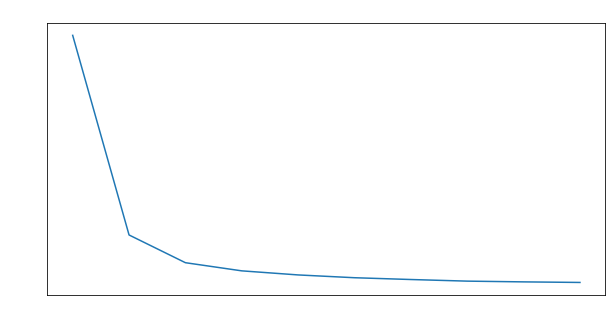

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(1,11),wcss)
plt.title('The elbow method',c='black')  
plt.xlabel('Number of clusters',c='black')  
plt.ylabel('WCSS',c='black')  
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()



#### Optimal number of clusters appears to be 3

## Analyzing features for visualization

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

print(iris_df)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


### Constructing new features for better visualization

In [8]:
iris_df['sepal'] = iris_df['sepal length (cm)'] - iris_df['sepal width (cm)'] 
iris_df['petal'] = iris_df['petal length (cm)'] - iris_df['petal width (cm)'] 


In [9]:
from sklearn.cluster import KMeans


x = iris_df.iloc[:,[0,1,2,3,4,5]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 350, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

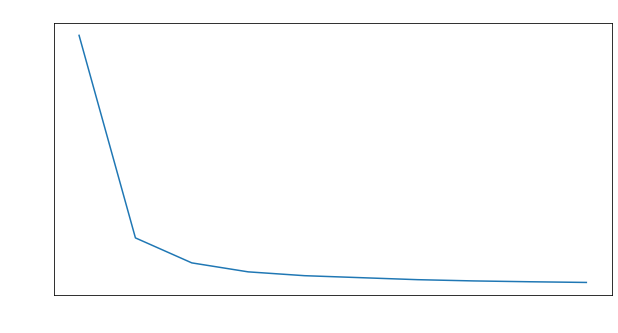

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(1,11),wcss)
plt.title('The elbow method',c='black')  
plt.xlabel('Number of clusters',c='black')  
plt.ylabel('WCSS',c='black')  
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()

#### Optimal number of clusters remains same after interoducing new features

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_df['Type'] = y_kmeans

### Analysing important features by constructing correlation matrix

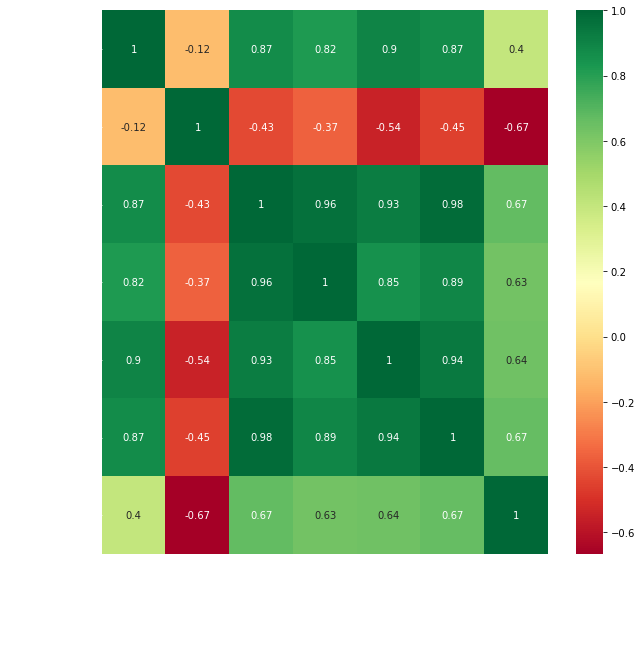

In [12]:
corrmat = iris_df.corr()
top_corr_features = corrmat.index

fig, ax = plt.subplots(figsize=(10,10))

 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#plot heat map
g=sns.heatmap(iris_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



### It can be inferred from the heat map that the newly introduced features 'sepal' and 'petal' have better correlation with the output 'Type' 

## Plotting the map using 'sepal' and 'petal' features

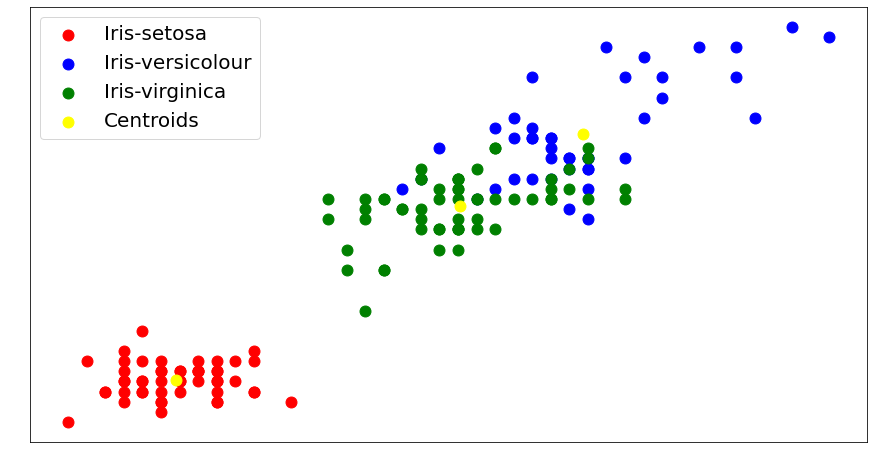

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.scatter(x[y_kmeans == 0,4], x[y_kmeans == 0,5], 
            s = 120, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,4], x[y_kmeans == 1,5], 
            s = 120, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,4], x[y_kmeans == 2,5],
            s = 120, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:,5], 
            s = 120, c = 'yellow', label = 'Centroids')


plt.legend(prop={'size': 20})

# Task Completed